### Dynamics of the COVID-19 infection - I
As the current Sars-CoV-2 Pandemic unfolds, the research group from the Swiss Institute of Bioinformatics, led by Richard Neher, developed a model to simulate the current Sars-CoV-2 Pandemic [1]. The Model is based on a SEIR [2] framework, which was extended to account for the specific questions of interest in the current Pandemic. A special focus was set to asses the strain on the healthcare system and to model the capacity overflow on ICU units. Furthermore, the effect on different age groups can be assessed and the isolation of age groups can be modeled and the effect of seasonal forcing on the spread of infection can be simulated [3]. The model was published as an interactive web application which freely accessible and lets the user explore fitted parameters based on observational data and custom parameters [4]. 

#### Structure of the model
The model is based on the compartimentisation of the Population into different categories based on their contact with the virus. Susceptible (S) People can become exposed (E), which can lead to an succsesfull infection with the virus. Infected (I) Population can then further infect susceptible indivisuals until recovery (R). As described the model assumes immunity after overcomming the infection.

$
\newcommand{ptr}[1]{\overset{\mathtt{#1}}{\longrightarrow}}                                  
                                             \fbox{S(t)}  \ptr{exposition}
                                              \fbox{E(t)}    \ptr{infection}
                                              \fbox{I(t)}     \ptr{recovery}
                                             \fbox{R(t)}
$

The default SEIR model was extendend to assess the strain of the pandemic on the healthcare system. Therefore the clinical stages between infection and recovery or Death (D) were modeled explicitly. Infected patients can transition to be hospitalized (H) based on the severity of the disease and treatement in an intensive care unit can become necessary. Based on the number of free ICU beds, these patients will be transitioned to the group of critical (C) patients in ICU or can become part of an overflow (O) compartement with a lower probability of recovery. This allows to model the case of an ICU overflow, which is associated with a higher fatality rate. Forecasting this is highly relevant, as an ICU overflow and overwhelming strain on the healthcare system needs to be mitigated in order to combat the Pandemic [5] 

$S(t)$ Susceptible people<br>
$E_1(t), E_2(t), E_3(t)$ Incubation states between infection and infectiousnes<br>
$I(t)$ Infected individuals<br>
$R(t)$ Recovered patients<br>
$D(t)$ Fatalaties due to infection<br>

#### Focus on the healthcare system capacity
All specified compartments are modeled at the level of individual age groups. Each of the age-groups as denoted by the index $a$ can have its own degree of isolation and probabilities to develope a critical stage of the disease. This is crucial in order to account for the varying severity of the disease based on the age [6].   

$H(t)$ Hospitalized patients<br>
$C(t)$ Critical patients in ICU<br>
$O(t)$ Critical patients which can't go to ICU because of ICU overflow<br>

$N$ Population size<br>
$t_i$ average time between onset of sickness and recovery / death<br>
$t_l$ latency time between infection and infectiousness<br>
$R_0$ Average number of transmissions during the course of infection<br><br>

$m_a$ The fraction of cases, which are asymptotic or mild<br>
$c_a$ The fraction of severe cases that turn critical<br>
$f_a$ the fraction of critical cases that end fatal<br>

$$
\begin{align*}
    \frac{dS(t)}{dt} &= -\beta S(t) I(t) N^{-1}\\
    \frac{dE_1(t)}{dt} &= \beta S(t) I(t) N^{-1} - 3 E_1(t) t_l^{-1}\\
    \frac{dE_2(t)}{dt} &= 3 E_1(t) t_l^{-1} - 3 E_2(t) t_l^{-1}\\
    \frac{dE_3(t)}{dt} &= 3 E_2(t) t_l^{-1} - 3 E_3(t) t_l^{-1}\\
    \frac{dI(t)}{dt} &= 3 E_3(t) t_l^{-1} - I(t) t_i^{-1} \\
    \frac{dH(t)}{dt} &= (1-m_a) I(t)t_i^{-1}  + (1-f_a) C(t)t_c^{-1} - H(t)t_h^{-1}\\
    \frac{dC(t)}{dt} &= c_a H(t)t_h^{-1} - C(t)t_c^{-1}\\
    \frac{dR(t)}{dt} &= m_aI(t) t_i^{-1} + (1-c_a)H(t)t_h^{-1} \\
    \frac{dD(t)}{dt} &= f_aC(t)t_c^{-1}
\end{align*}
$$

<br>
$\beta_a(t)$ Seasonal infection rate. An infectious Person transmits the virus to $\beta_a(t)t_i$ healthy persons on average over the course of the infection.<br><br>
$$\beta_a(t) = R_0 \zeta_{\alpha}(1+\epsilon \cos(2\pi(t-t_{max})/365))t_i^{-1}  \prod_{k}M_{k}(t)  $$

$t_{max} = 15$<br>
$\epsilon = 0.1$


[1] COVID-19 Scenarios: an interactive tool to explore the spread and associated morbidity and mortality of SARS-CoV-2
Nicholas B Noll, Ivan Askamentov, Valentine Druelle, Abrie Badenhorst, Gavin Jefferies, Jan Albert, Richard Neher
medRxiv 2020.05.05.20091363; doi: https://doi.org/10.1101/2020.05.05.20091363

[2] Kermack, W.O., McKendrick, A.G. Contributions to the mathematical theory of epidemics—I. Bltn Mathcal Biology 53, 33–55 (1991). https://doi.org/10.1007/BF02464423

[3] Neher R.A., Dyrdak R., Druelle V., Hodcroft EB., Albert J. Potential impact of seasonal forcing on a SARS-CoV-2 pandemic. Swiss Med Wkly. 150, w20224 (2020). https://doi.org/10.4414/smw.2020.20224

[4] COVID-19 Scenarios https://covid19-scenarios.org/

[5] Jason Phua, Li Weng, Lowell Ling, Moritoki Egi, Chae-Man Lim, Jigeeshu Vasishtha Divatia, Babu Raja Shrestha, Yaseen M Arabi, Jensen Ng, Charles D Gomersall, Masaji Nishimura, Younsuck Koh, Bin Du,
Intensive care management of coronavirus disease 2019 (COVID-19): challenges and recommendations,
The Lancet Respiratory Medicine,
Volume 8, Issue 5,
2020,
Pages 506-517,
ISSN 2213-2600,
https://doi.org/10.1016/S2213-2600(20)30161-2.

[6] Estimates of the severity of COVID-19 disease
Robert Verity, Lucy C Okell, Ilaria Dorigatti, Peter Winskill, Charles Whittaker, Natsuko Imai, Gina Cuomo-Dannenburg, Hayley Thompson, Patrick Walker, Han Fu, Amy Dighe, Jamie Griffin, Anne Cori, Marc Baguelin, Sangeeta Bhatia, Adhiratha Boonyasiri, Zulma M Cucunuba, Rich Fitzjohn, Katy A M Gaythorpe, Will Green, Arran Hamlet, Wes Hinsley, Daniel Laydon, Gemma Nedjati-Gilani, Steven Riley, Sabine van-Elsand, Erik Volz, Haowei Wang, Yuanrong Wang, Xiayoue Xi, Christl Donnelly, Azra Ghani, Neil Ferguson
medRxiv 2020.03.09.20033357; doi: https://doi.org/10.1101/2020.03.09.20033357

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

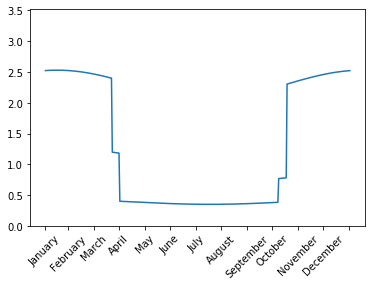

In [65]:
def cbeta(t,cm):
    zeta = 1
    M = 1
    epsilon = 0.1
    t_max = 15
    t_i = 3
    R_0 = 2.3
    R = R_0 * zeta * (1+epsilon*np.cos(2*np.pi*(t-t_max)/365))
    
    if isinstance(t,np.ndarray):
        for m in cm:
            effect = np.where(np.logical_and(m["time"][0] < t, m["time"][1] > t))
            R[effect] *= (1 - m["reduction"][0])
        
    else:
        for m in cm:
            R *= (1 - m["reduction"][0]) if m["time"][0] < t < m["time"][1] else 1
            
    return R/t_i
t = np.linspace(1,365,365)

cm = [{"time": [80,280],
         "reduction": [0.5]},
     {"time": [89,290],
         "reduction": [0.66]}]

cm0 = []

R_0 = cbeta(t,cm)*3
plt.plot(t,R_0)
plt.ylim((0,max(R_0)+1))
plt.xticks([0, 28, 59, 89, 120, 150, 181, 211, 242, 272, 303, 333,364], 
           ["January", 'February', "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=45)
plt.show()

In [62]:
def system(v,t):
    N = 82927922
    tl = 3
    ti = 3
    
    cm = [{"time": [80,280],
         "reduction": [0.5]},
     {"time": [89,290],
         "reduction": [0.66]}]
    
    m_a = 0.9
    f_a = 0.05
    c_a = 0.1
    th = 3
    tc = 14
    beta = cbeta(t,cm)
    
    S, E1, E2, E3, I, H, C, R, D = v
    
    dSdt = -beta*S*I/N
    dE1dt = beta*S*I/N - 3*E1/tl
    dE2dt = 3*E1/tl - 3*E2/tl
    dE3dt = 3*E2/tl - 3*E3/tl
    dIdt = 3*E3/tl - I/ti
    dHdt = (1-m_a)*I/ti + (1-f_a)*C/tc - H/th
    dCdt = c_a*H/th - C/tc
    dRdt = m_a*I/ti + (1-c_a)*H/th
    dDdt = f_a*C/tc
    
    dvdt = [dSdt,dE1dt,dE2dt,dE3dt,dIdt,dHdt,dCdt,dRdt,dDdt]
    
    return dvdt

(array([  0,   0,   0, ..., 743, 743, 743]), array([1, 2, 3, ..., 3, 4, 5]))


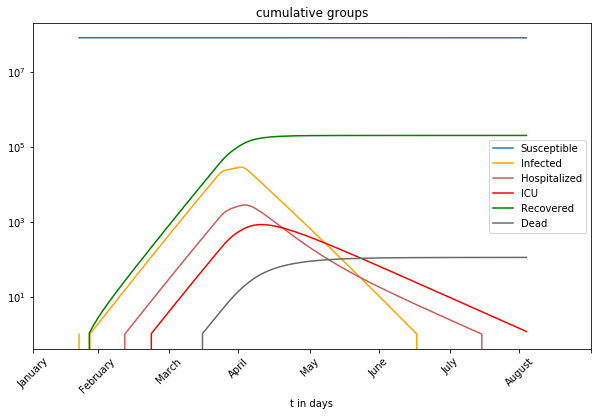

In [63]:
t = np.linspace(20,214,186*4)

N = 82927922

v0 = [N-1,0,0,0,1,0,0,0,0]

solution = odeint(system, v0, t)

larger = np.where(solution < 1)
solution[larger] = 0
print(larger)

plt.plot(t,solution[:,0], label=r"Susceptible")
plt.plot(t,solution[:,4], label=r"Infected", c="orange")
plt.plot(t,solution[:,5], label=r"Hospitalized", c="indianred")
plt.plot(t,solution[:,6], label=r"ICU", c="red")
plt.plot(t,solution[:,7], label=r"Recovered", c="green")
plt.plot(t,solution[:,8], label=r"Dead", c="dimgrey")

plt.title("cumulative groups")
plt.xlabel("t in days")
plt.legend(loc='best')
fig = plt.gcf()
plt.yscale("log")
fig.set_size_inches(10, 6)
plt.xticks([0, 28, 59, 89, 120, 150, 181, 211, 242, ], 
           ["January", 'February', "March", "April", "May", "June", "July", "August"], rotation=45)
plt.show()